In [1]:
import pandas as pd
import rootpath
import os 

In [2]:
%matplotlib inline
import Orange
import matplotlib.pyplot as plt

In [3]:
import pandas as pd 
import rootpath
import seaborn as sns
import os 
import math
import scipy
from scipy.optimize import curve_fit
import numpy as np

In [4]:
EVALUATION_DATA_PATH = os.path.join(rootpath.detect(), 'data', 'evaluations')

In [6]:
evaluation_data = pd.read_csv(os.path.join(EVALUATION_DATA_PATH, 'evaluation_csv_data_br_factor.csv'))

In [5]:
evaluation_data_1 = pd.read_csv(os.path.join(EVALUATION_DATA_PATH, 'evaluation_csv_data_br_factor.csv'))

In [7]:
evaluation_data_1

,file_name,avg_branch_factor,number_leaves,nodes_number,execution_time_kolo,[BRANCH-LENGTH]-ffac_best_correction_factor,[BRANCH-LENGTH]-execution_time_radial_layout,[BRANCH-LENGTH]-execution_time_corrections_adj_based,[BRANCH-LENGTH]-execution_time_corrections_fixed_based,[BRANCH-LENGTH]-unordered_tree_stress,...,[LEAF-COUNT]-nodes_number,[LEAF-COUNT]-execution_time_kolo,[LEAF-COUNT]-ffac_best_correction_factor,[LEAF-COUNT]-execution_time_radial_layout,[LEAF-COUNT]-execution_time_corrections_adj_based,[LEAF-COUNT]-execution_time_corrections_fixed_based,[LEAF-COUNT]-unordered_tree_stress,[LEAF-COUNT]-ordered_tree_stress,[LEAF-COUNT]-ordered_tree_fixed_angle_correction_stress,[LEAF-COUNT]-ordered_tree_adj_based_corrections_stress
0,S143710,2.000000,15,29,0.001672,2.0,0.002991,0.024029,0.094913,0.432101,...,29,0.001725,2.0,0.003145,0.024636,0.097999,0.171578,0.167101,0.167101,0.166374
1,S142831,2.000000,391,781,8.441655,3.2,2.906173,2.917544,92.888234,0.682144,...,781,8.212938,2.2,2.928015,3.133880,96.861632,0.492302,0.497200,0.497173,0.496835
2,S111261,2.000000,14,27,0.001326,50.0,0.002369,0.020794,0.079459,0.740527,...,27,0.001681,2.0,0.003163,0.029174,0.108580,0.213699,0.213280,0.213280,0.210412
3,S151470,2.000000,53,105,0.028934,52.8,0.038132,0.115411,1.337164,0.989272,...,105,0.026820,2.0,0.037011,0.106969,1.265967,0.285972,0.285504,0.285504,0.284560
4,S105200,2.000000,298,595,3.707797,2.2,1.353021,1.798080,55.299524,0.698811,...,595,4.028544,2.0,1.629793,2.106718,57.530555,0.630346,0.631377,0.631377,0.630580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,S138603,2.333333,37,64,0.027630,1.8,0.014502,0.063679,0.533260,1.258762,...,64,0.028533,2.0,0.016483,0.072535,0.646781,0.337372,0.325339,0.325339,0.323044
365,S131190,2.400000,36,61,0.035472,2.4,0.015198,0.068623,0.507486,0.536265,...,61,0.047557,2.0,0.015974,0.088285,0.644004,0.395224,0.388738,0.388738,0.388085
366,S118920,2.416667,18,30,0.008046,1.4,0.003421,0.030183,0.110160,0.737621,...,30,0.009990,2.0,0.004568,0.031674,0.113137,0.207856,0.197359,0.197359,0.197465
367,S116180,2.636364,19,30,0.023746,1.8,0.003297,0.032639,0.112957,0.685715,...,30,0.026881,2.0,0.003898,0.033293,0.120700,0.437704,0.405103,0.405103,0.395827


In [12]:
evaluation_data

,file_name,avg_branch_factor,number_leaves,nodes_number,execution_time_kolo,[BRANCH-LENGTH]-ffac_best_correction_factor,[BRANCH-LENGTH]-execution_time_radial_layout,[BRANCH-LENGTH]-execution_time_corrections_adj_based,[BRANCH-LENGTH]-execution_time_corrections_fixed_based,[BRANCH-LENGTH]-unordered_tree_stress,...,[LEAF-COUNT]-nodes_number,[LEAF-COUNT]-execution_time_kolo,[LEAF-COUNT]-ffac_best_correction_factor,[LEAF-COUNT]-execution_time_radial_layout,[LEAF-COUNT]-execution_time_corrections_adj_based,[LEAF-COUNT]-execution_time_corrections_fixed_based,[LEAF-COUNT]-unordered_tree_stress,[LEAF-COUNT]-ordered_tree_stress,[LEAF-COUNT]-ordered_tree_fixed_angle_correction_stress,[LEAF-COUNT]-ordered_tree_adj_based_corrections_stress
0,S143710,2.000000,15,29,0.001720,2.0,0.006222,0.062217,0.200588,0.432101,...,29,0.001766,2.0,0.005811,0.096684,0.210720,0.171578,0.167101,0.167101,0.165537
1,S142831,2.000000,391,781,10.073008,3.2,6.431099,20.548160,221.135445,0.682144,...,781,13.432431,2.2,6.766403,31.513388,218.138723,0.492302,0.497200,0.497173,0.496877
2,S111261,2.000000,14,27,0.001455,50.0,0.004900,0.082350,0.170114,0.740527,...,27,0.001434,2.0,0.004755,0.079894,0.167874,0.213699,0.213280,0.213280,0.211951
3,S151470,2.000000,53,105,0.029269,52.8,0.081296,0.537123,2.796623,0.989272,...,105,0.034685,2.0,0.079784,0.602415,3.741161,0.285972,0.285504,0.285504,0.284552
4,S105200,2.000000,298,595,3.559742,2.2,2.919093,13.003548,105.992895,0.698811,...,595,3.532543,2.0,2.730953,12.479378,100.778910,0.630346,0.631377,0.631377,0.630534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,S138603,2.333333,37,64,0.045445,1.8,0.041681,0.403166,1.597859,1.258762,...,64,0.033331,2.0,0.036479,0.245352,1.329517,0.337372,0.325339,0.325339,0.323044
365,S131190,2.400000,36,61,0.042634,2.4,0.038427,0.319278,1.194944,0.536265,...,61,0.037599,2.0,0.032289,0.217168,1.244145,0.395224,0.388738,0.388738,0.388085
366,S118920,2.416667,18,30,0.007348,1.4,0.005887,0.067806,0.204571,0.737621,...,30,0.007443,2.0,0.005831,0.064554,0.199946,0.207856,0.197359,0.197359,0.197465
367,S116180,2.636364,19,30,0.025335,1.8,0.006844,0.147238,0.231749,0.685715,...,30,0.023936,2.0,0.006128,0.104098,0.224585,0.437704,0.405103,0.405103,0.395719


In [12]:
# Average best correction factor for LEAF COUNT based FFAC
evaluation_data['[LEAF-COUNT]-ffac_best_correction_factor'].mean()

2.0151761517615188

In [13]:
# Max best correction factor for LEAF COUNT based FFAC
evaluation_data['[LEAF-COUNT]-ffac_best_correction_factor'].max()

2.6

In [14]:
# Min best correction factor for LEAF COUNT based FFAC
evaluation_data['[LEAF-COUNT]-ffac_best_correction_factor'].min()

1.7999999999999998

<StemContainer object of 3 artists>

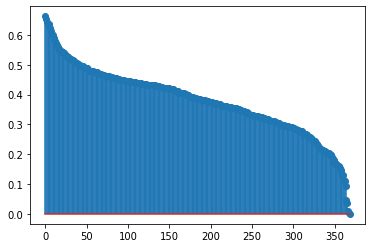

In [59]:
stress_data = evaluation_data[['file_name', '[LEAF-COUNT]-ordered_tree_stress']].copy()
stress_data.sort_values(by='[LEAF-COUNT]-ordered_tree_stress', inplace=True, ascending=False)
plt.stem(stress_data['[LEAF-COUNT]-ordered_tree_stress'].tolist())

# Notes : 
# Make figure wider 
# Q-Q-Plot 
# Color sticks by branch-factor//network size (bin sizes)
 

In [27]:
# Node number histogram data
node_numbers = evaluation_data[['file_name', 'nodes_number']].copy()
node_numbers.sort_values(by='nodes_number', inplace=True)
node_numbers['bin'] = pd.cut(node_numbers['nodes_number'], [0, 100, 200, 300, 400, 500,10000000], labels=['0-100', '100-200', '200-300','300-400', '400-500','500+'])

In [28]:
# Node number groups
grouped_data = node_numbers[['file_name', 'bin']].groupby('bin').count()
grouped_data
# grouped_data.plot(kind='bar')
# Note: smaller bins

,file_name
bin,
0-100,216
100-200,96
200-300,28
300-400,18
400-500,4
500+,7


<StemContainer object of 3 artists>

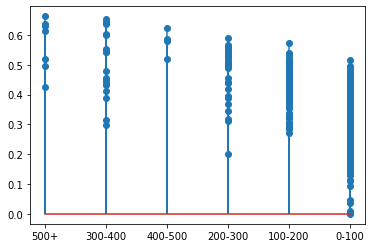

In [65]:
stress_data = evaluation_data[['file_name', '[LEAF-COUNT]-ordered_tree_stress', 'nodes_number']].copy()
stress_data['bin'] = pd.cut(stress_data['nodes_number'], [0, 100, 200, 300, 400, 500,10000000], labels=['0-100', '100-200', '200-300','300-400', '400-500','500+'])
stress_data.sort_values(by='[LEAF-COUNT]-ordered_tree_stress', inplace=True, ascending=False)
plt.stem(stress_data['bin'].tolist(), stress_data['[LEAF-COUNT]-ordered_tree_stress'].tolist())

In [19]:
# KOLO execution time vs node number
time_nodes = evaluation_data[['file_name','[LEAF-COUNT]-execution_time_kolo', 'nodes_number', 'number_leaves','avg_branch_factor']].copy()
time_nodes.sort_values(by='avg_branch_factor', inplace=True)
time_nodes[350:]

,file_name,[LEAF-COUNT]-execution_time_kolo,nodes_number,number_leaves,avg_branch_factor
350,S138600,0.007910,51,28,2.173913
351,S157132,0.044833,86,47,2.179487
352,S127320,0.079497,143,78,2.184615
353,S124820,0.010526,36,20,2.187500
354,S135481,0.005560,47,26,2.190476
355,S138606,0.015544,67,37,2.200000
356,S147523,0.011452,45,25,2.200000
357,S140384,0.017900,41,23,2.222222
358,S109660,0.100996,144,80,2.234375
359,S127383,0.105527,102,57,2.244444


Text(0, 0.5, 'Execution time in seconds')

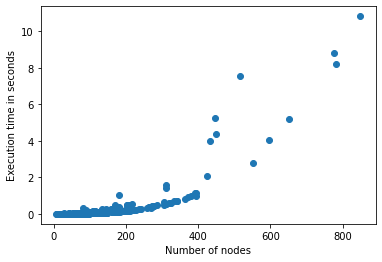

In [20]:
# Scatter plot -- time vs node_number -- add branching factor
execution_time_kolo = time_nodes['[LEAF-COUNT]-execution_time_kolo'].tolist()
node_numbers = time_nodes['nodes_number'].tolist()
avg_branch_factor = time_nodes['avg_branch_factor'].tolist()
plt.scatter(node_numbers, execution_time_kolo)
# plt.plot(node_numbers, avg_branch_factor,  color = 'r')
plt.xlabel('Number of nodes')
plt.ylabel('Execution time in seconds')



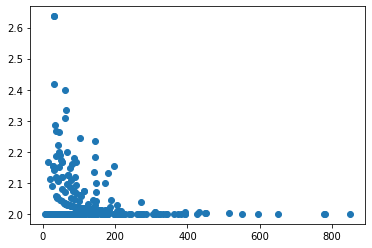

In [34]:
# Scatter plot -- time vs node_number -- add branching factor
execution_time_kolo = time_nodes['execution_time_kolo'].tolist()
node_numbers = time_nodes['nodes_number'].tolist()
avg_branch_factor = time_nodes['avg_branch_factor'].tolist()
plt.scatter(node_numbers, avg_branch_factor)


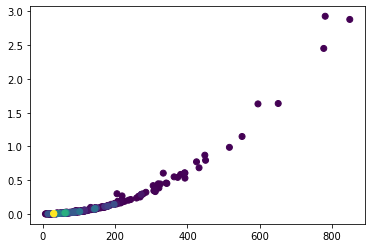

In [22]:
# Scatter plot -- time vs node_number -- add branching factor
execution_time_kolo = evaluation_data['[LEAF-COUNT]-execution_time_radial_layout'].tolist()
node_numbers = evaluation_data['nodes_number'].tolist()
avg_branch_factor = evaluation_data['avg_branch_factor'].tolist()
plt.scatter(node_numbers, execution_time_kolo, c=avg_branch_factor)

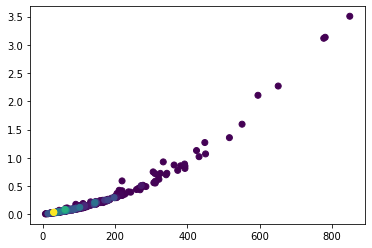

In [24]:
# Scatter plot -- time vs node_number -- add branching factor
execution_time_kolo = evaluation_data['[LEAF-COUNT]-execution_time_corrections_adj_based'].tolist()
node_numbers = evaluation_data['nodes_number'].tolist()
avg_branch_factor = evaluation_data['avg_branch_factor'].tolist()
plt.scatter(node_numbers, execution_time_kolo, c=avg_branch_factor)

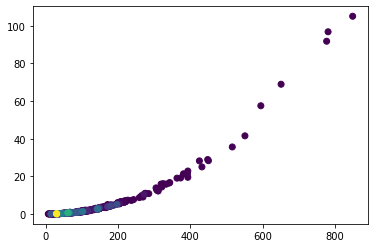

In [25]:
# Scatter plot -- time vs node_number -- add branching factor
execution_time_kolo = evaluation_data['[LEAF-COUNT]-execution_time_corrections_fixed_based'].tolist()
node_numbers = evaluation_data['nodes_number'].tolist()
avg_branch_factor = evaluation_data['avg_branch_factor'].tolist()
plt.scatter(node_numbers, execution_time_kolo, c=avg_branch_factor)

In [27]:
# trees with most stress reduced by ANBC 
stress_data = evaluation_data[['file_name', 'nodes_number','[LEAF-COUNT]-ordered_tree_stress', '[LEAF-COUNT]-ordered_tree_fixed_angle_correction_stress']].copy()
stress_data['stress_dif'] = stress_data['[LEAF-COUNT]-ordered_tree_fixed_angle_correction_stress'] - stress_data['[LEAF-COUNT]-ordered_tree_stress'] 
stress_data.sort_values(by='stress_dif', inplace=True, ascending=True)
stress_data

,file_name,nodes_number,[LEAF-COUNT]-ordered_tree_stress,[LEAF-COUNT]-ordered_tree_fixed_angle_correction_stress,stress_dif
173,S107260,19,0.035466,0.029503,-5.962365e-03
288,S1094314,68,0.232743,0.226781,-5.961996e-03
51,S154420,83,0.204056,0.200087,-3.969827e-03
363,S1094311,61,0.331783,0.328676,-3.107089e-03
95,S141290,95,0.046123,0.043156,-2.966924e-03
...,...,...,...,...,...
17,S131840,285,0.454596,0.454596,2.220446e-16
104,S147522,49,0.268899,0.268899,2.775558e-16
191,S112830,551,0.636877,0.636877,3.330669e-16
266,S129753,104,0.434632,0.434632,3.885781e-16


In [33]:
time_nodes = evaluation_data[['[LEAF-COUNT]-execution_time_kolo', 'nodes_number', 'avg_branch_factor']].copy()
time_nodes.sort_values(by='[LEAF-COUNT]-execution_time_kolo', inplace=True)
execution_time_kolo = time_nodes['[LEAF-COUNT]-execution_time_kolo'].tolist()
# execution_time_kolo = [math.log2(time) for time in execution_time_kolo]
node_numbers = time_nodes['nodes_number'].tolist()

In [124]:
def curve(x,a,b):
    return a*x**b

In [36]:
classes = []
for time_node in time_nodes['avg_branch_factor'].tolist():
    if time_node == 2:
        classes.append('2')
    elif time_node > 2 and time_node <= 2.1:
        classes.append('2-2.1')
    elif time_node > 2.1 and time_node <= 2.2:
        classes.append('2.1-2.2')
    elif time_node > 2.2 and time_node <=2.3:
        classes.append('2.2-2.3')
    elif time_node > 2.3 and time_node <= 2.4:
        classes.append('2.3-2.4')
    elif time_node > 2.4 and time_node <= 2.5:
        classes.append('2.4-2.5')
    else:
        classes.append('2.5+')

In [131]:
popt, popcv = curve_fit(curve,node_numbers,execution_time_kolo)
print(popt)
xfine = np.linspace(0,800, 100) # define values to plot the function for
popt[0] * 10e6

[1.32718386e-06 2.34943807e+00]


13.271838636600021

array([0.00000000e+00, 1.57241968e-06, 1.30261176e-05, 4.48698666e-05,
       1.07909957e-04, 2.13142902e-04, 3.71707482e-04, 5.94856719e-04,
       8.93939329e-04, 1.28038650e-03, 1.76570196e-03, 2.36145423e-03,
       3.07927040e-03, 3.93083108e-03, 4.92786607e-03, 6.08215078e-03,
       7.40550312e-03, 8.90978079e-03, 1.06068789e-02, 1.25087279e-02,
       1.46272917e-02, 1.69745660e-02, 1.95625766e-02, 2.24033785e-02,
       2.55090540e-02, 2.88917121e-02, 3.25634871e-02, 3.65365381e-02,
       4.08230473e-02, 4.54352201e-02, 5.03852835e-02, 5.56854861e-02,
       6.13480968e-02, 6.73854045e-02, 7.38097176e-02, 8.06333633e-02,
       8.78686868e-02, 9.55280514e-02, 1.03623838e-01, 1.12168442e-01,
       1.21174280e-01, 1.30653780e-01, 1.40619388e-01, 1.51083565e-01,
       1.62058786e-01, 1.73557542e-01, 1.85592337e-01, 1.98175690e-01,
       2.11320134e-01, 2.25038214e-01, 2.39342489e-01, 2.54245531e-01,
       2.69759924e-01, 2.85898266e-01, 3.02673166e-01, 3.20097244e-01,
      

NameError: name 'array' is not defined

<AxesSubplot:>

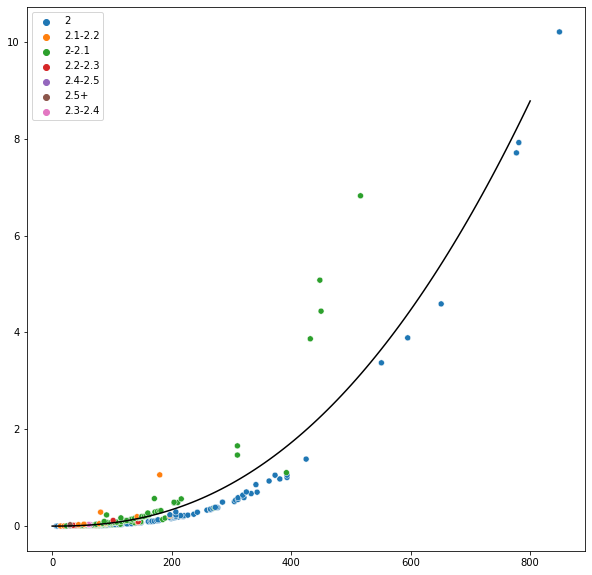

In [129]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(x=xfine, y=curve(xfine,*popt), ax=ax,color='black')
sns.scatterplot(x=node_numbers, y=execution_time_kolo, hue=classes,ax=ax)